In [5]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import necessary libraries
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image  # Import this line
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
import zipfile
import os

# Zip file is in the same folder as the notebook, so just specify the file name
zip_file = 'archive.zip' 

# Output folder where the dataset will be extracted
output_folder = 'extracted_data/'  

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unzip the dataset into the output folder
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

# List the extracted files and check the structure
print(os.listdir(output_folder))

['Brain_Tumor_MRI_Image_Dataset']


In [8]:
import os

# List the contents of the extracted folder
extracted_files = os.listdir(output_folder)
print("Extracted files:", extracted_files)

# Check if there is a 'Training' folder, or any similar folder names
for folder in extracted_files:
    folder_path = os.path.join(output_folder, folder)
    if os.path.isdir(folder_path):
        print(f"Contents of '{folder}' folder:", os.listdir(folder_path))

Extracted files: ['Brain_Tumor_MRI_Image_Dataset']
Contents of 'Brain_Tumor_MRI_Image_Dataset' folder: ['Testing', 'Testing_Augmented', 'Training', 'Training_Augmented']


In [9]:
import os

# Define the path to the 'Training' folder
training_folder_path = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training'

# Get the list of image files in the 'Training' folder
image_files = os.listdir(training_folder_path)
print(f"Number of images in the Training folder: {len(image_files)}")

# You can print the list of files if you'd like to inspect them
for image in image_files:
    print(image)

Number of images in the Training folder: 4
glioma
meningioma
notumor
pituitary


Found the 'Training' directory: extracted_data/Brain_Tumor_MRI_Image_Dataset\Training
Subfolders in 'Training': ['glioma', 'meningioma', 'notumor', 'pituitary']


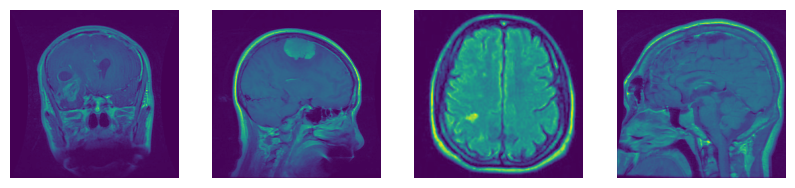

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the correct path for the 'Training' folder
train_dir = os.path.join(output_folder, 'Brain_Tumor_MRI_Image_Dataset', 'Training')

# Check if the 'Training' directory exists
if os.path.exists(train_dir):
    print("Found the 'Training' directory:", train_dir)
else:
    print("Training directory not found!")

# Get the list of subfolders (e.g., 'glioma', 'meningioma', 'no_tumor', 'pituitary')
subfolders = os.listdir(train_dir)
print(f"Subfolders in 'Training': {subfolders}")

# Initialize list to store sample images
sample_images = []

# Loop through each subfolder (class) and sample 1 image from each
for subfolder in subfolders:
    subfolder_path = os.path.join(train_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Get all image files in this subfolder
        image_files = os.listdir(subfolder_path)
        if len(image_files) > 0:
            # Select a random image from this subfolder
            sample_image = random.choice(image_files)
            sample_images.append(os.path.join(subfolder_path, sample_image))

# Display the sample images
if sample_images:
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(sample_images):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(sample_images), i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
else:
    print("No images found to display.")

In [11]:
import os
import numpy as np
import cv2  # OpenCV for image preprocessing (you can also use other libraries like PIL)
from tensorflow.keras.preprocessing.image import img_to_array

# Define the correct label map based on folder names
label_map = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

# Define directories for training and testing data
train_dir = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training'
test_dir = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing'

# Function to preprocess images (e.g., resizing and normalization)
def preprocess_image(img_path, target_size=(128, 128)):
    # Read the image from file
    img = cv2.imread(img_path)
    
    # Resize the image to the target size (e.g., 128x128)
    img = cv2.resize(img, target_size)
    
    # Convert the image to an array (needed for neural network input)
    img = img_to_array(img)
    
    # Normalize the image (pixel values between 0 and 1)
    img = img / 255.0
    
    return img

# Function to load data and labels
def load_data(directory):
    images = []
    labels = []
    
    # Loop through the subfolders
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            # Check if the subfolder name exists in the label_map
            if subfolder in label_map:
                for img_file in os.listdir(subfolder_path):
                    img_path = os.path.join(subfolder_path, img_file)
                    images.append(preprocess_image(img_path))
                    labels.append(label_map[subfolder])  # Assign label based on subfolder name
            else:
                print(f"Warning: '{subfolder}' not found in label_map")
    
    return np.array(images), np.array(labels)

# Load training and testing data
train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

# Display the shapes of the data arrays
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training images shape: (5712, 128, 128, 3)
Training labels shape: (5712,)
Testing images shape: (1311, 128, 128, 3)
Testing labels shape: (1311,)


In [12]:
import os
import numpy as np
import cv2  # OpenCV for image preprocessing (you can also use other libraries like PIL)
from tensorflow.keras.preprocessing.image import img_to_array

# Define the correct label map based on folder names
label_map = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

# Define directories for training and testing data
train_dir = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training'
test_dir = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing'

# Function to preprocess images (e.g., resizing and normalization)
def preprocess_image(img_path, target_size=(128, 128)):
    # Read the image from file
    img = cv2.imread(img_path)
    
    # Resize the image to the target size (e.g., 128x128)
    img = cv2.resize(img, target_size)
    
    # Convert the image to an array (needed for neural network input)
    img = img_to_array(img)
    
    # Normalize the image (pixel values between 0 and 1)
    img = img / 255.0
    
    return img

# Function to load data and labels
def load_data(directory):
    images = []
    labels = []
    
    # Loop through the subfolders
    for subfolder in os.listdir(directory):
        subfolder_path = os.path.join(directory, subfolder)
        if os.path.isdir(subfolder_path):
            # Check if the subfolder name exists in the label_map
            if subfolder in label_map:
                for img_file in os.listdir(subfolder_path):
                    img_path = os.path.join(subfolder_path, img_file)
                    images.append(preprocess_image(img_path))
                    labels.append(label_map[subfolder])  # Assign label based on subfolder name
            else:
                print(f"Warning: '{subfolder}' not found in label_map")
    
    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Ensure the images have the correct shape (num_samples, height, width, channels)
    if images.ndim == 3:  # If the images array is 3D (height, width, channels)
        images = np.expand_dims(images, axis=-1)  # Add the channel dimension if missing (for grayscale)
    return images, labels

# Load training and testing data
train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

# Display the shapes of the data arrays
print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing images shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

# Make sure images are of shape (num_samples, 128, 128, 3) for RGB images or (num_samples, 128, 128, 1) for grayscale
assert train_images.shape[1:] == (128, 128, 3), f"Expected shape (128, 128, 3), got {train_images.shape[1:]}"
assert test_images.shape[1:] == (128, 128, 3), f"Expected shape (128, 128, 3), got {test_images.shape[1:]}"

Training images shape: (5712, 128, 128, 3)
Training labels shape: (5712,)
Testing images shape: (1311, 128, 128, 3)
Testing labels shape: (1311,)


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 4569
Validation set size: 1143


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the correct paths to the Training and Testing directories
training_path = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training'
testing_path = r'c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling only for testing/validation data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    training_path,
    target_size=(64, 64),  # Resize images to (64, 64)
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' since labels are integers
)

# Load testing/validation data
val_generator = test_datagen.flow_from_directory(
    testing_path,
    target_size=(64, 64),  # Resize images to (64, 64)
    batch_size=32,
    class_mode='sparse'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and testing data, we only rescale the images
test_datagen = ImageDataGenerator(rescale=1./255)

# Fit the generator to the data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = test_datagen.flow(X_val, y_val, batch_size=32)

In [18]:
from tensorflow.keras import layers, models

def create_cnn_model(img_size=(64, 64, 3)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_size))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))  # 4 classes: glioma, meningioma, notumor, pituitary
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
cnn_model = create_cnn_model()
cnn_model.summary()

c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,468 (2.47 MB)

 Trainable params: 646,468 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Found 500 images belonging to 3 classes.
Found 280 images belonging to 3 classes.
Augmented Training data contains 'notumor': False
Augmented Testing data contains 'notumor': False
Training directory exists: True
Testing directory exists: True
Training Augmented directory exists: True
Testing Augmented directory exists: True


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       589,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,468 (2.47 MB)

 Trainable params: 646,468 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5723 - loss: 0.9577 - val_accuracy: 0.7422 - val_loss: 0.6276
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8445 - loss: 0.4176 - val_accuracy: 0.8261 - val_loss: 0.4602
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8881 - loss: 0.3035 - val_accuracy: 0.8558 - val_loss: 0.3629
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9228 - loss: 0.2178 - val_accuracy: 0.9108 - val_loss: 0.2352
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9487 - loss: 0.1396 - val_accuracy: 0.9199 - val_loss: 0.2604
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.9656 - loss: 0.1023 - val_accuracy: 0.9489 - val_loss: 0.1570
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.9801 - loss: 0.0610 - val_accuracy: 0.9405 - val_loss: 0.1800
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9861 - loss: 0.0429 - val_accuracy: 0.945

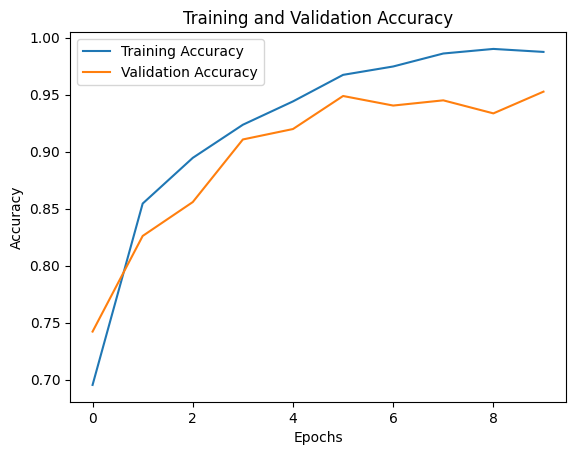

In [19]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Define image size and batch size
img_size = (64, 64)  # Resize images
batch_size = 32

# Path to the extracted dataset
train_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training'
test_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing'
train_aug_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training_Augmented'
test_aug_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing_Augmented'

# Create ImageDataGenerators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load original training data (including 'notumor')
train_data = train_datagen.flow_from_directory(
    train_dir,  # Path to the original training directory
    target_size=img_size,  # Resize images
    batch_size=batch_size,  # Batch size for training
    class_mode='sparse'  # Use sparse labels for multi-class classification
)

# Load original testing data (including 'notumor')
test_data = test_datagen.flow_from_directory(
    test_dir,  # Path to the original testing directory
    target_size=img_size,  # Resize images
    batch_size=batch_size,  # Batch size for testing
    class_mode='sparse'  # Use sparse labels for multi-class classification
)

# Load augmented training data (without 'notumor' class)
train_aug_data = train_datagen.flow_from_directory(
    train_aug_dir,  # Path to the augmented training directory
    target_size=img_size,  # Resize images
    batch_size=batch_size,  # Batch size for augmented training
    class_mode='sparse'  # Use sparse labels for multi-class classification
)

# Load augmented testing data (without 'notumor' class)
test_aug_data = test_datagen.flow_from_directory(
    test_aug_dir,  # Path to the augmented testing directory
    target_size=img_size,  # Resize images
    batch_size=batch_size,  # Batch size for augmented testing
    class_mode='sparse'  # Use sparse labels for multi-class classification
)

# Verify if the augmented data contains 'notumor' class
print("Augmented Training data contains 'notumor':", 'notumor' in train_aug_data.class_indices)
print("Augmented Testing data contains 'notumor':", 'notumor' in test_aug_data.class_indices)

# Check if the directories exist
print("Training directory exists:", os.path.exists(train_dir))
print("Testing directory exists:", os.path.exists(test_dir))
print("Training Augmented directory exists:", os.path.exists(train_aug_dir))
print("Testing Augmented directory exists:", os.path.exists(test_aug_dir))

# Create CNN Model
def create_cnn_model(img_size=(64, 64, 3)):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_size))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))  # 4 classes: glioma, meningioma, notumor, pituitary
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
cnn_model = create_cnn_model()

# Check the model summary
cnn_model.summary()

# Train the model
history = cnn_model.fit(
    train_data,  # Train on the original training data
    epochs=10,  # Adjust epochs as needed
    validation_data=test_data  # Use the original testing data for validation
)

# Optionally, you can also train with augmented data:
# history = cnn_model.fit(
#     train_data,  # Train on original training data
#     epochs=10,
#     validation_data=test_data,  # Validate on original testing data
#     steps_per_epoch=len(train_data),  # Use the full augmented data
#     validation_steps=len(test_data)
# )

# Generate predictions on the test data
y_pred = cnn_model.predict(test_data)

# Convert predictions to labels
import numpy as np
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
y_true = test_data.classes  # Ground truth labels
cm = confusion_matrix(y_true, y_pred_labels)

print("Confusion Matrix:")
print(cm)

# Plot the training and validation accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Classification Report:
              precision    recall  f1-score   support

      glioma       0.17      0.16      0.17       300
  meningioma       0.23      0.24      0.24       306
     notumor       0.28      0.28      0.28       405
   pituitary       0.22      0.22      0.22       300

    accuracy                           0.23      1311
   macro avg       0.23      0.23      0.23      1311
weighted avg       0.23      0.23      0.23      1311



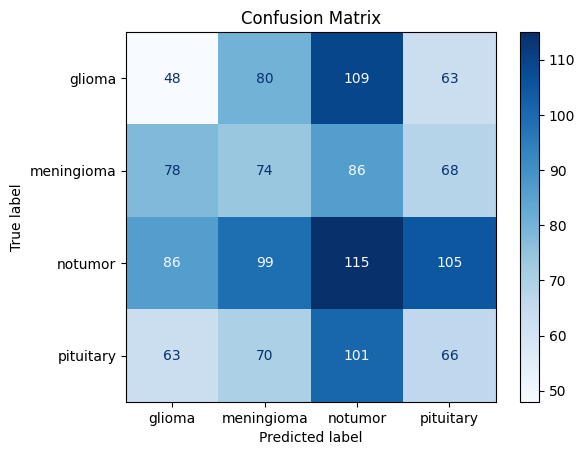

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Generate classification report
report = classification_report(y_true, y_pred_labels, target_names=list(test_data.class_indices.keys()))
print("Classification Report:")
print(report)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [21]:
def create_tuned_cnn_model(img_size=(64, 64, 3), learning_rate=0.001):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_size))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Add dropout to reduce overfitting
    model.add(layers.Dense(4, activation='softmax'))  # 4 classes

    # Compile model with custom learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the tuned model
tuned_cnn_model = create_tuned_cnn_model(learning_rate=0.0005)  # Adjust learning rate here
history = tuned_cnn_model.fit(
    train_data,
    epochs=15,  # Increase epochs if needed
    validation_data=test_data
)

Epoch 1/15


c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.4778 - loss: 1.1134 - val_accuracy: 0.7124 - val_loss: 0.7352
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.7759 - loss: 0.5978 - val_accuracy: 0.7407 - val_loss: 0.6747
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.8128 - loss: 0.4880 - val_accuracy: 0.7910 - val_loss: 0.4877
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8545 - loss: 0.3841 - val_accuracy: 0.8002 - val_loss: 0.4642
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.8844 - loss: 0.3347 - val_accuracy: 0.8383 - val_loss: 0.3649
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8955 - loss: 0.2898 - val_accuracy: 0.8551 - val_loss: 0.3508
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.9075 - loss: 0.2523 - val_accuracy: 0.8665 - val_loss: 0.2934
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9177 - loss: 0.2138 - val_accuracy: 0.904

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision = precision_score(y_true, y_pred_labels, average='weighted')
recall = recall_score(y_true, y_pred_labels, average='weighted')
f1 = f1_score(y_true, y_pred_labels, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.23
Recall: 0.23
F1 Score: 0.23


In [23]:
# Save the trained model
tuned_cnn_model.save("brain_tumor_cnn_model.h5")
print("Model saved as 'brain_tumor_cnn_model.h5'")

Model saved as 'brain_tumor_cnn_model.h5'


In [24]:
# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(tuned_cnn_model)
tflite_model = converter.convert()

# Save the TFLite model
with open("brain_tumor_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted to TensorFlow Lite and saved as 'brain_tumor_model.tflite'")

INFO:tensorflow:Assets written to: C:\Users\Neha\AppData\Local\Temp\tmpx_5j3mut\assets


INFO:tensorflow:Assets written to: C:\Users\Neha\AppData\Local\Temp\tmpx_5j3mut\assets


Saved artifact at 'C:\Users\Neha\AppData\Local\Temp\tmpx_5j3mut'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='keras_tensor_239')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2052689686800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052689686608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2052689687184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217061712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217066512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217064976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217066320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217063440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217064592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2054217067664: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model 

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Paths to datasets
train_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training'
test_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing'
train_aug_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Training_Augmented'
test_aug_dir = r'C:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\extracted_data\Brain_Tumor_MRI_Image_Dataset\Testing_Augmented'

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_aug_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Training Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary"
)

train_aug_generator = train_aug_datagen.flow_from_directory(
    train_aug_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary"
)

# Testing Generators
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

test_aug_generator = test_datagen.flow_from_directory(
    test_aug_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train Model Separately on Both Datasets
print("Training on original data...")
history1 = model.fit(
    train_generator,
    epochs=10
)

print("Training on augmented data...")
history2 = model.fit(
    train_aug_generator,
    epochs=10
)

# Evaluate on Test Data
print("Evaluating on test data...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("Evaluating on augmented test data...")
test_aug_loss, test_aug_accuracy = model.evaluate(test_aug_generator)
print(f"Augmented Test Accuracy: {test_aug_accuracy * 100:.2f}%")

# Save Model
model.save("brain_tumor_cnn_model_v3.h5")
print("Model saved as 'brain_tumor_cnn_model_v3.h5'")

Found 5712 images belonging to 4 classes.
Found 500 images belonging to 3 classes.
Found 1311 images belonging to 4 classes.
Found 280 images belonging to 3 classes.
Training on original data...
Epoch 1/10


c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Neha\OneDrive\Desktop\BRAIN TUMOR IDENTIFIER\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.2349 - loss: -667.5729
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2312 - loss: -150564.9531
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2409 - loss: -2613435.7500
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.2364 - loss: -16312555.0000
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.2350 - loss: -59162644.0000
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.2370 - loss: -162884480.0000
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.2277 - loss: -374173728.0000
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.2416 - loss: -734698176.0000
Epoch 9/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.2318 - loss: -1322558976.0000
Epoch 10/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.2368 - loss: -2143795584.0000
Training on augmented data...
Epoch 1/10
16/16 ━━━━━━━━━━━━━━

Augmented Test Accuracy: 28.57%
Model saved as 'brain_tumor_cnn_model_v3.h5'


In [46]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tkinter import Tk, filedialog, Label, Button
import os

# Load the trained model
model = load_model("brain_tumor_cnn_model.h5")

# Function to preprocess the input image
def preprocess_image(image_path, target_size=(64, 64)):
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        print(f"Preprocessed Image Shape: {img_array.shape}")
        return img_array
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Function to validate if the image is an MRI scan
def validate_image(image_path):
    try:
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print("Error: Image could not be loaded.")
            return False  # Image is not valid (could not be loaded)
        
        # Ensure the image is sufficiently large
        if img.shape[0] < 64 or img.shape[1] < 64:
            print(f"Image dimensions too small: {img.shape}")
            return False  # Image too small to be a valid MRI scan

        return True
    except Exception as e:
        print(f"Error during validation: {e}")
        return False

# Function to make predictions using a threshold
def predict_brain_tumor(image_path, threshold=0.5):
    if not validate_image(image_path):
        return "Invalid Input: The uploaded image is not an MRI scan."

    # Preprocess the image
    img_array = preprocess_image(image_path)
    if img_array is None:
        return "Error processing the image. Please upload a valid MRI image."

    # Predict using the model
    prediction = model.predict(img_array)
    print(f"Prediction Probabilities: {prediction}")

    # Extract the probability of "Brain Tumor"
    brain_tumor_probability = prediction[0][1]  # Assuming index 1 corresponds to "Brain Tumor"
    
    # Threshold-based classification
    if brain_tumor_probability >= threshold:
        confidence = brain_tumor_probability * 100
        return f"Prediction: Brain Tumor (Confidence: {confidence:.2f}%)"
    else:
        confidence = (1 - brain_tumor_probability) * 100
        return f"Prediction: No Brain Tumor (Confidence: {confidence:.2f}%)"

# GUI for selecting an image file
def select_image():
    image_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg *.jpeg *.png")]
    )
    if image_path:
        result_label.config(text="Image selected: " + os.path.basename(image_path))
        
        # Run prediction
        result = predict_brain_tumor(image_path, threshold=0.5)
        result_label.config(text=result)

# Create a Tkinter window
root = Tk()
root.title("Brain Tumor Detection")
root.geometry("500x250")

# Add a label
label = Label(root, text="Choose an MRI image to detect brain tumor:", font=("Arial", 14))
label.pack(pady=10)

# Add a button to choose an image
button = Button(root, text="Choose Image", command=select_image, font=("Arial", 12))
button.pack(pady=10)

# Add a label to display results
result_label = Label(root, text="", font=("Arial", 12))
result_label.pack(pady=10)

# Run the GUI event loop
root.mainloop()

Preprocessed Image Shape: (1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction Probabilities: [[1.1705410e-11 7.7642244e-01 2.2357124e-01 6.3024490e-06]]


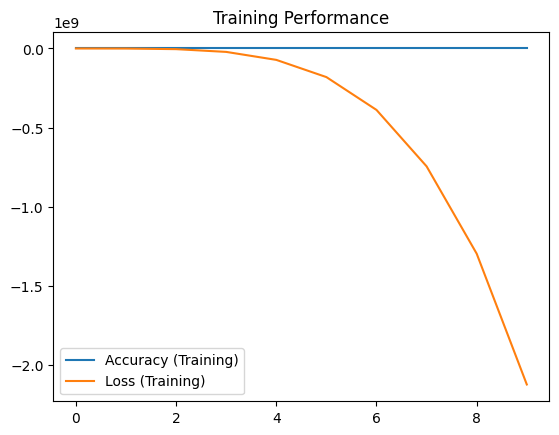

In [15]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history1.history['accuracy'], label='Accuracy (Training)')
plt.plot(history1.history['loss'], label='Loss (Training)')
plt.legend()
plt.title('Training Performance')
plt.show()

In [1]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tkinter import Tk, filedialog, Label, Button
import os

# Load the trained model
model = load_model("brain_tumor_cnn_model.h5")

# Function to preprocess the input image
def preprocess_image(image_path, target_size=(64, 64)):
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        return img_array
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Function to validate if the image is an MRI scan
def validate_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return False  # Image is not valid (could not be loaded)
    
    # Ensure the image is sufficiently large
    if img.shape[0] < 64 or img.shape[1] < 64:
        return False  # Image too small to be a valid MRI scan

    # Add other checks for MRI image characteristics if necessary
    return True

# Function to make predictions
def predict_brain_tumor(image_path):
    if not validate_image(image_path):
        return "Invalid Input: The uploaded image is not an MRI scan."

    # Preprocess the image
    img_array = preprocess_image(image_path)
    if img_array is None:
        return "Error processing the image. Please upload a valid MRI image."

    # Predict using the model
    prediction = model.predict(img_array)
    class_labels = ["No Brain Tumor", "Brain Tumor"]
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class] * 100

    if predicted_class == 0:
        return f"Prediction: No Brain Tumor (Confidence: {confidence:.2f}%)"
    else:
        return f"Prediction: Brain Tumor (Confidence: {confidence:.2f}%)"

# GUI for selecting an image file
def select_image():
    image_path = filedialog.askopenfilename(
        filetypes=[("Image Files", "*.jpg *.jpeg *.png")]
    )
    if image_path:
        result_label.config(text="Image selected: " + os.path.basename(image_path))
        
        # Run prediction
        result = predict_brain_tumor(image_path)
        result_label.config(text=result)

# Create a Tkinter window
root = Tk()
root.title("Brain Tumor Detection")
root.geometry("500x200")

# Add a label
label = Label(root, text="Choose an MRI image to detect brain tumor:", font=("Arial", 14))
label.pack(pady=10)

# Add a button to choose an image
button = Button(root, text="Choose Image", command=select_image, font=("Arial", 12))
button.pack(pady=10)

# Add a label to display results
result_label = Label(root, text="", font=("Arial", 12))
result_label.pack(pady=10)

# Run the GUI event loop
root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
